In [1]:
#start. importing all necessary modules

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re, string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd


stop_words = stopwords.words('english')

In [6]:
#preparing a download link 

url = 'https://drive.google.com/file/d/1Ytg9xAeZu4p-c6mcKDodHI3W7wLJ4sIo/view?usp=sharing'
url_ = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url_)

print('id =', url.split('/')[-2])

print('my url:', url_)

id = 1Ytg9xAeZu4p-c6mcKDodHI3W7wLJ4sIo
my url: https://drive.google.com/uc?id=1Ytg9xAeZu4p-c6mcKDodHI3W7wLJ4sIo


In [33]:
#in this part we are going to read the csv file and create the dataframe.
#surprize! it works really well 

df = pd.read_csv(url_, header= None)
#print(df)
print('dataframe dimension:', df.shape)
df.head(n = len(df))

dataframe dimension: (10, 2)


,0,1
0,__label__0,study interventions are recombinant CD40-ligan...
1,__label__0,study interventions are Liposomal doxorubicin ...
2,__label__0,study interventions are BI 836909 . multiple m...
3,__label__0,study interventions are Immunoglobulins . recu...
4,__label__0,study interventions are Paclitaxel . stage ova...
5,__label__1,study interventions are Pazopanib . carcinoma ...
6,__label__1,study interventions are Dexamethasone 21-phosp...
7,__label__1,study interventions are Camptothecin . rectal ...
8,__label__1,study interventions are Cyclophosphamide . sta...
9,__label__1,study interventions are Cyclophosphamide . lym...


In [16]:
#adding all rows to one list for future "cleaning", here df[1] is responsible for the second colomn

data_set = list(df[1])
print('all data from file:', data_set)

all data from file: ['study interventions are recombinant CD40-ligand . melanoma skin diagnosis and no active cns metastases by ct scan or mri', 'study interventions are Liposomal doxorubicin . colorectal cancer diagnosis and cardiovascular', 'study interventions are BI 836909 . multiple myeloma diagnosis and indwelling central venous cateder or willingness to undergo intra venous central line placement', 'study interventions are Immunoglobulins . recurrent fallopian tube carcinoma diagnosis and patients are allowed to receive but are not required to receive two additional cytotoxic regimens for management of recurrent or persistent disease with no more than one non platinum non taxane regimen', 'study interventions are Paclitaxel . stage ovarian cancer diagnosis and patients must have recovered from the effects of recent surgery radiotherapy or other therapy', 'study interventions are Pazopanib . carcinoma renal cell diagnosis and pregnant or lactating female', 'study interventions ar

In [17]:
#now we separate the data_set from the file by given labels


label1 = ''
label2 = ''
for i in range (len(df[0])):
    if df[0][i] == '__label__0':
        label1 += df[1][i]
    if df[0][i] == '__label__1':
        label2 += df[1][i]
        
print('For example __label__0:', label1)


For example __label__0: study interventions are recombinant CD40-ligand . melanoma skin diagnosis and no active cns metastases by ct scan or mristudy interventions are Liposomal doxorubicin . colorectal cancer diagnosis and cardiovascularstudy interventions are BI 836909 . multiple myeloma diagnosis and indwelling central venous cateder or willingness to undergo intra venous central line placementstudy interventions are Immunoglobulins . recurrent fallopian tube carcinoma diagnosis and patients are allowed to receive but are not required to receive two additional cytotoxic regimens for management of recurrent or persistent disease with no more than one non platinum non taxane regimenstudy interventions are Paclitaxel . stage ovarian cancer diagnosis and patients must have recovered from the effects of recent surgery radiotherapy or other therapy


In [24]:
# the most important part of this code. 
#TOKENIZING, REMOVING STOPWORDS AND PUNCTUATION, STEMMING OR LEMMATIZATION 

def cleaning(label):

    filtered = re.sub(r'[^\w\s]', '', label)
    filtered = re.sub("@\S+", "", filtered)
    filtered = re.sub("https*\S+", "", filtered)
    filtered = re.sub("\d", "", filtered)
    filtered = re.sub("#\S+", "", filtered)

    filtered = filtered.lower()
    #print(filtered)
    tokens = word_tokenize(filtered)
    #print(tokens)
    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)
    #print(filtered_tokens)
    filtered_tokens_set = set(filtered_tokens)
    #print(filtered_tokens_set)
    lemmatizer = WordNetLemmatizer()
    #stemmer = PorterStemmer()
    # stemmed_tokens = [stemmer.stem(s) for s in filtered_tokens_set]
    # print('stemming:', stemmed_tokens)

    lemmatizer = [lemmatizer.lemmatize(l) for l in filtered_tokens_set]
    #print("lemmatization:", lemmatized_tokens)
    return lemmatizer


In [26]:
#let's use the func and check the result

lemmatized_label1 = cleaning(label1)
lemmatized_label2 = cleaning(label2)
print(lemmatized_label2) #the result check for label2

all_cleaned_data = lemmatized_label2 + lemmatized_label1 #this may be needed in the future 

['cyclophosphamide', 'visual', 'presence', 'prior', 'camptothecin', 'active', 'cancer', 'clearance', 'lymphoma', 'hepatitis', 'line', 'infection', 'pregnant', 'best', 'less_than', 'least', 'study', 'iii', 'creatinine', 'minstudy', 'phosphate', 'investigator', 'vaccination', 'sstudy', 'diagnosis', 'rectal', 'renal', 'intervention', 'carcinoma', 'patient', 'pazopanib', 'stage', 'lactating', 'condition', 'cell', 'including', 'fifty', 'femalestudy', 'agent', 'melanoma', 'acuitystudy', 'uveal', 'ml', 'dexamethasone', 'administration', 'concurrent', 'hodgkin', 'prevent', 'non', 'one', 'improvement', 'two', 'investigational', 'ocular', 'opinion', 'corrected']


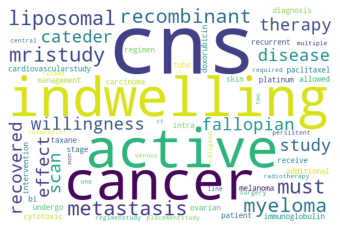

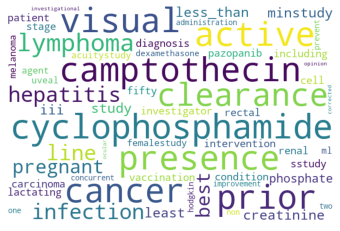

In [28]:
#vizualizing the unigrams

def visualize_for_uni(lemlabel):
    string_data = ''
    for i in lemlabel:
        string_data += (' ' + i)
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(string_data)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize_for_uni(lemmatized_label1)
visualize_for_uni(lemmatized_label2)

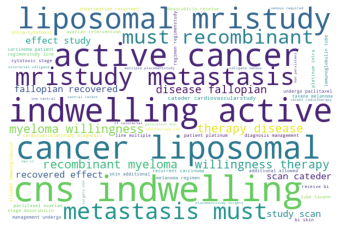

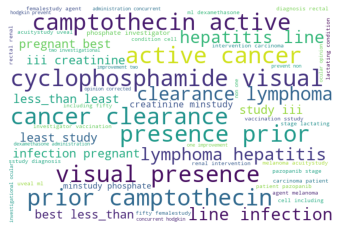

In [29]:
#vizualizing the bigrams

def vizualize_for_bi(lemlabel):
    string_data = ''
    for i in lemlabel:
        string_data += (' ' + i)
    wordcloud = WordCloud(width=600, height=400, background_color="white", collocation_threshold = 3).generate(string_data)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

vizualize_for_bi(lemmatized_label1)
vizualize_for_bi(lemmatized_label2)

In [ ]:
"""TASK COMPLETED! STAY SAFE :)"""